# import Data & Load Data & info Data

In [1]:
#Import Lib
# Data Fram & Deal With Data
import pandas as pd
import numpy as np
from pandas import DataFrame
from numpy import mean
from numpy import std
import statistics

# Pre Proccessing Data & Missing data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

#Visual Data
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from keras_visualizer import visualizer  

# Models
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import linear_model
import pickle

# Evaluate Models
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 



In [2]:
#Load Data & print Shape for all each
train_01 = pd.read_csv('Data/train_01.csv')
train_02 = pd.read_csv('Data/train_02.csv')
train_03 = pd.read_csv('Data/train_03.csv')
train_04 = pd.read_csv('Data/train_04.csv')

print(train_01.shape)
print(train_02.shape)
print(train_03.shape)
print(train_04.shape)


(1052, 11)
(680, 9)
(104, 12)
(1124, 9)


In [3]:
#Data info
train_01.info()
print('_'*40)
train_02.info()
print('_'*40)
train_03.info()
print('_'*40)
train_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   water content%   1052 non-null   float64
 1   dry uint weight  1052 non-null   float64
 2   gypsum content%  1052 non-null   int64  
 3   c                1052 non-null   int64  
 4   angle friction   1052 non-null   int64  
 5   load Kpa         1052 non-null   int64  
 6   L/B              1052 non-null   int64  
 7   spacing          1052 non-null   int64  
 8   frequencies Hz   1052 non-null   int64  
 9   Time min         1052 non-null   float64
 10  sett as (S/B0%   1052 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 90.5 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gy

# Show Data head and Initial cleaning 

In [4]:
#Show Data
train_01.head()

,water content%,dry uint weight,gypsum content%,c,angle friction,load Kpa,L/B,spacing,frequencies Hz,Time min,sett as (S/B0%
0,1.9,15.97,60,11,37,30,1,80,10,1770.0,0.00562
1,1.9,15.97,60,11,37,30,1,80,10,1890.0,0.00677
2,1.9,15.97,60,11,37,30,1,80,10,1940.0,0.00677
3,1.9,15.97,60,11,37,30,1,80,10,2020.0,0.00676
4,1.9,15.97,60,11,37,30,1,80,10,2110.0,0.00675


In [5]:
#Show Data
train_02.tail()

,Gypsum content%,Water content%,Dry unit weight,cohesion,Angle friction,L/B,load(Kpa),Time,settlement
675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#drop null value 
train_02=train_02.dropna(axis=0)

In [7]:
print(train_02.shape)

(664, 9)


In [8]:
#Show Data
train_03.head()

,Wc%,uint weight,gypsum content%,Angle friction,cohesion,L/B,load(Kpa),sett(mm),Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,3.2,16.2,45,31,7,1,22.9,0.38,NaN,NaN,NaN,NaN
1,3.2,16.2,45,31,7,1,50.1,0.96,NaN,NaN,NaN,NaN
2,3.2,16.2,45,31,7,1,62.6,1.54,NaN,NaN,NaN,NaN
3,3.2,16.2,45,31,7,1,75.1,2.02,NaN,NaN,NaN,NaN
4,3.2,16.2,45,31,7,1,87.6,2.61,NaN,NaN,NaN,NaN


In [9]:
train_03.isnull().sum()

Wc%                  0
uint weight          0
gypsum content%      0
Angle friction       0
cohesion             0
L/B                  0
load(Kpa)            0
sett(mm)             0
Unnamed: 8         104
Unnamed: 9         104
Unnamed: 10        104
Unnamed: 11        104
dtype: int64

In [10]:
# drop Columns is null
train_03 = train_03.drop(['Unnamed: 8', 'Unnamed: 9','Unnamed: 10','Unnamed: 11'], axis=1)

In [11]:
print(train_03.isnull().sum())
print('shap is ', train_03.shape)

Wc%                0
uint weight        0
gypsum content%    0
Angle friction     0
cohesion           0
L/B                0
load(Kpa)          0
sett(mm)           0
dtype: int64
shap is  (104, 8)


In [12]:
#Show Data
train_03.head()

,Wc%,uint weight,gypsum content%,Angle friction,cohesion,L/B,load(Kpa),sett(mm)
0,3.2,16.2,45,31,7,1,22.9,0.38
1,3.2,16.2,45,31,7,1,50.1,0.96
2,3.2,16.2,45,31,7,1,62.6,1.54
3,3.2,16.2,45,31,7,1,75.1,2.02
4,3.2,16.2,45,31,7,1,87.6,2.61


In [13]:
train_04.head()

,gypsum content%,cohesion,dry uint weight,angle friction,Dr%,D/B,L/B,Load (Kpa),sett mm
0,0,0,14.86,40.41,9.9,0.0,6.4,6.971,0.026
1,0,0,14.86,40.41,9.9,0.0,6.4,8.404,0.055
2,0,0,14.86,40.41,9.9,0.0,6.4,9.836,0.055
3,0,0,14.86,40.41,9.9,0.0,6.4,11.269,0.112
4,0,0,14.86,40.41,9.9,0.0,6.4,12.892,0.141


# Describe all Data

In [14]:
train_01.describe()

,water content%,dry uint weight,gypsum content%,c,angle friction,load Kpa,L/B,spacing,frequencies Hz,Time min,sett as (S/B0%
count,1.052000e+03,1.052000e+03,1052.0,1052.000000,1052.000000,1052.0,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,1.900000e+00,1.597000e+01,60.0,8.076046,32.614068,30.0,2.129278,398.326996,19.458175,3728.815220,0.128185
std,2.221502e-16,1.777202e-15,0.0,1.774627,2.661941,0.0,1.454158,379.505732,8.195469,2086.388976,0.110648
min,1.900000e+00,1.597000e+01,60.0,7.000000,31.000000,30.0,1.000000,80.000000,10.000000,1474.550490,0.000600
25%,1.900000e+00,1.597000e+01,60.0,7.000000,31.000000,30.0,1.000000,80.000000,10.000000,1499.551152,0.028867
50%,1.900000e+00,1.597000e+01,60.0,7.000000,31.000000,30.0,1.000000,240.000000,20.000000,3429.291790,0.106705
75%,1.900000e+00,1.597000e+01,60.0,11.000000,37.000000,30.0,4.000000,640.000000,30.000000,5685.996178,0.193862
max,1.900000e+00,1.597000e+01,60.0,11.000000,37.000000,30.0,4.000000,1280.000000,30.000000,7730.000000,0.598750


In [15]:
train_02.describe()

,Gypsum content%,Water content%,Dry unit weight,cohesion,Angle friction,L/B,load(Kpa),Time,settlement
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.0,664.0,664.000000,664.000000
mean,36.844880,10.240964,16.813253,4.858434,38.754518,1.0,200.0,2547.959337,0.857863
std,18.450742,3.344802,0.864608,3.400535,1.978286,0.0,0.0,2242.026987,0.703036
min,12.000000,6.000000,15.300000,0.000000,36.100000,1.0,200.0,7.000000,0.082000
25%,12.000000,6.000000,16.000000,0.000000,36.500000,1.0,200.0,928.250000,0.245750
50%,30.000000,10.000000,16.900000,6.000000,38.700000,1.0,200.0,2003.000000,0.657000
75%,55.000000,14.000000,17.600000,8.000000,40.600000,1.0,200.0,3440.500000,1.243000
max,55.000000,14.000000,17.800000,9.000000,40.900000,1.0,200.0,10949.000000,2.339000


In [16]:
# Print Unique Value for data
def  GetUniqValue(data):
    for col in data.columns:
        # Get unique values using unique() method
        deptUniq = data[col].drop_duplicates()
        print("-------Unique values-------\n",deptUniq)

GetUniqValue(train_02)        

-------Unique values-------
 0      12.0
185    30.0
349    55.0
Name: Gypsum content%, dtype: float64
-------Unique values-------
 0       6.0
62     10.0
150    14.0
Name: Water content%, dtype: float64
-------Unique values-------
 0      17.0
62     17.6
150    17.8
185    16.6
349    15.3
456    16.0
537    16.9
Name: Dry unit weight, dtype: float64
-------Unique values-------
 0      0.0
185    6.0
229    8.0
258    7.0
456    9.0
537    4.0
Name: cohesion, dtype: float64
-------Unique values-------
 0      38.5
62     40.6
150    38.7
185    36.1
229    40.0
258    36.5
349    36.2
456    40.9
Name: Angle friction, dtype: float64
-------Unique values-------
 0    1.0
Name: L/B, dtype: float64
-------Unique values-------
 0    200.0
Name: load(Kpa), dtype: float64
-------Unique values-------
 0        42.0
1        80.0
2       108.0
3        91.0
4       165.0
        ...  
659    4555.0
660    4601.0
661    4663.0
662    4692.0
663    4726.0
Name: Time, Length: 615, dtype: float

In [17]:
train_03.describe()

,Wc%,uint weight,gypsum content%,Angle friction,cohesion,L/B,load(Kpa),sett(mm)
count,104.0,1.040000e+02,104.0,104.000000,104.000000,104.0,104.000000,104.000000
mean,3.2,1.620000e+01,45.0,32.846154,8.230769,1.0,250.532692,4.981923
std,0.0,3.569918e-15,0.0,2.782641,1.855094,0.0,177.517540,3.946338
min,3.2,1.620000e+01,45.0,31.000000,7.000000,1.0,22.400000,0.100000
25%,3.2,1.620000e+01,45.0,31.000000,7.000000,1.0,119.500000,1.645000
50%,3.2,1.620000e+01,45.0,31.000000,7.000000,1.0,210.500000,3.855000
75%,3.2,1.620000e+01,45.0,37.000000,11.000000,1.0,344.500000,7.755000
max,3.2,1.620000e+01,45.0,37.000000,11.000000,1.0,703.000000,13.800000


In [18]:
GetUniqValue(train_03)        

-------Unique values-------
 0    3.2
Name: Wc%, dtype: float64
-------Unique values-------
 0    16.2
Name: uint weight, dtype: float64
-------Unique values-------
 0    45
Name: gypsum content%, dtype: int64
-------Unique values-------
 0     31
19    37
Name: Angle friction, dtype: int64
-------Unique values-------
 0      7
19    11
Name: cohesion, dtype: int64
-------Unique values-------
 0    1
Name: L/B, dtype: int64
-------Unique values-------
 0       22.9
1       50.1
2       62.6
3       75.1
4       87.6
       ...  
99     374.0
100    383.0
101    390.0
102    400.0
103    398.0
Name: load(Kpa), Length: 95, dtype: float64
-------Unique values-------
 0       0.38
1       0.96
2       1.54
3       2.02
4       2.61
       ...  
97      7.52
98      9.45
99     10.70
100    11.80
103    13.80
Name: sett(mm), Length: 97, dtype: float64


In [19]:
train_04.describe()

,gypsum content%,cohesion,dry uint weight,angle friction,Dr%,D/B,L/B,Load (Kpa),sett mm
count,1124.0,1124.0,1124.000000,1124.000000,1124.000000,1124.000000,1.124000e+03,1124.000000,1124.000000
mean,0.0,0.0,15.657927,44.349137,44.835703,0.936833,6.400000e+00,147.294071,2.761671
std,0.0,0.0,1.224016,4.751162,26.833308,0.770976,1.777148e-15,121.163961,2.718565
min,0.0,0.0,13.500000,35.150000,5.450000,0.000000,6.400000e+00,1.922000,0.022000
25%,0.0,0.0,14.560000,40.410000,9.900000,0.000000,6.400000e+00,43.439750,0.833750
50%,0.0,0.0,15.400000,46.610000,45.300000,0.500000,6.400000e+00,109.635500,1.742000
75%,0.0,0.0,16.810000,47.890000,72.200000,1.500000,6.400000e+00,227.829500,3.711250
max,0.0,0.0,17.580000,49.100000,74.420000,2.000000,6.400000e+00,490.604000,12.419000


In [20]:
GetUniqValue(train_04)        

-------Unique values-------
 0    0
Name: gypsum content%, dtype: int64
-------Unique values-------
 0    0
Name: cohesion, dtype: int64
-------Unique values-------
 0      14.86
37     14.56
70     14.17
91     13.50
110    15.39
139    16.10
172    15.69
193    14.50
212    17.06
242    17.58
264    16.81
286    15.40
Name: dry uint weight, dtype: float64
-------Unique values-------
 0      40.41
37     38.96
70     35.70
91     35.15
110    46.64
139    46.61
172    45.10
193    43.98
212    49.10
242    48.66
264    47.81
286    47.89
Name: angle friction, dtype: float64
-------Unique values-------
 0       9.90
37      5.45
70      9.62
91      9.81
110    52.72
139    45.30
172    44.63
193    40.50
212    74.42
242    72.73
264    68.33
286    72.20
304     5.54
Name: Dr%, dtype: float64
-------Unique values-------
 0      0.0
304    0.5
565    1.0
639    1.5
882    2.0
Name: D/B, dtype: float64
-------Unique values-------
 0    6.4
Name: L/B, dtype: float64
-------Unique values

# Merge Data 

In [21]:
print(train_01.columns)
print(train_02.columns)
print(train_03.columns)
print(train_04.columns)

Index(['water content%', 'dry uint weight', 'gypsum content%', 'c',
       'angle friction', 'load Kpa', 'L/B', 'spacing', 'frequencies Hz',
       'Time min', 'sett as (S/B0%'],
      dtype='object')
Index(['Gypsum content%', 'Water content%', 'Dry unit weight', 'cohesion',
       'Angle friction', 'L/B', 'load(Kpa)', 'Time', 'settlement'],
      dtype='object')
Index(['Wc%', 'uint weight', 'gypsum content%', 'Angle friction', 'cohesion',
       'L/B', 'load(Kpa)', 'sett(mm)'],
      dtype='object')
Index(['gypsum content%', 'cohesion', 'dry uint weight', 'angle friction',
       'Dr%', 'D/B', 'L/B', 'Load (Kpa)', 'sett mm'],
      dtype='object')


In [22]:
# Rename Columns
train_01.columns = ['WC', 'DUW' , 'GC' , 'C' , 'AF' , 'LKpa' , 'LB'  , 'Spac' , 'FHz' , 'TMin' , 'Sett' ]
train_02.columns = ['GC', 'WC'  , 'DUW' , 'C' , 'AF' , 'LB'  , 'LKpa' , 'TMin' , 'Sett' ]
train_03.columns = ['WC', 'DUW' , 'GC' , 'AF', 'C' , 'LB' , 'LKpa' , 'Sett' ]
train_04.columns = ['GC', 'C' , 'DUW' , 'AF', 'DR' , 'DB' , 'LB', 'LKpa' , 'Sett' ]

In [23]:
# Order By Columns
train_01 = train_01[['WC', 'DUW' , 'GC' , 'AF', 'C' , 'LB' , 'LKpa' , 'TMin', 'Sett' ]]
train_02 = train_02[['WC', 'DUW' , 'GC' , 'AF', 'C' , 'LB' , 'LKpa' , 'TMin', 'Sett' ]]
train_03 = train_03[['WC', 'DUW' , 'GC' , 'AF', 'C' , 'LB' , 'LKpa' , 'Sett'  ]]
train_04 = train_04[['DUW' , 'GC' , 'AF', 'C' , 'LB' , 'LKpa' ,'DR','DB', 'Sett'  ]]
# Define list of Columns
Columns_df=['WC', 'DUW' , 'GC' , 'AF', 'C' , 'LB' , 'LKpa' ,'TMin','DR','DB', 'Sett'  ]

In [24]:
# Insert Columns Not Found in data
train_02.insert(8, "DR", np.nan)
train_02.insert(9, "DB", np.nan)

train_03.insert(7, "TMin", np.nan)
train_03.insert(8, "DR", np.nan)
train_03.insert(9, "DB", np.nan)

train_04.insert(0, "WC", np.nan)
train_04.insert(7, "TMin", np.nan)

# Combine Data Set

In [25]:
train_df = pd.concat([train_02, train_03,train_04 ])

# Fill Missing Value all Columns

In [26]:
# define the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# transform the dataset
train_df = imputer.fit_transform(train_df)
# count the number of NaN values in each column
print('Missing: %d' % np.isnan(train_df).sum())

Missing: 0


In [27]:
#Convert Numpy to DataFram
train_df = pd.DataFrame(train_df,columns=Columns_df)
train_df.head()
train_df.isnull().sum()

WC      0
DUW     0
GC      0
AF      0
C       0
LB      0
LKpa    0
TMin    0
DR      0
DB      0
Sett    0
dtype: int64

In [28]:
#Save merge data
import os
# if file does not exist write header 
if not os.path.isfile(r'Data/df_train.csv'):
    train_df.to_csv(r'Data/df_train.csv', index = False)


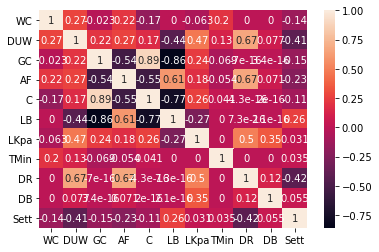

In [29]:
# print Corrleations
corrMatrix = train_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:ylabel='Frequency'>

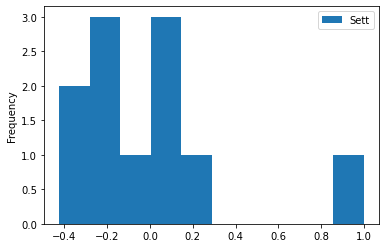

In [30]:
df_corr = train_df.corr()
df_corr[['Sett']].plot(kind='hist')
#print (df_corr)

In [31]:
#Create dataframe for correlation between columns and target(Settlement)
df_corr_bar= df_corr.iloc[-1,0:-1]
df_corr_bar=df_corr_bar.to_frame()

print(df_corr_bar)

          Sett
WC   -0.139953
DUW  -0.409079
GC   -0.152053
AF   -0.234492
C    -0.105818
LB    0.256143
LKpa  0.031387
TMin  0.035270
DR   -0.423584
DB    0.055485


Text(0.5, 0, 'columns name')

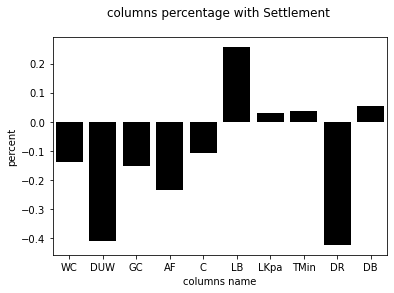

In [32]:
#Draw corrleation as barplot
sns.barplot(x=df_corr_bar.index, y = 'Sett', data = df_corr_bar, color = 'black')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('columns percentage with Settlement \n')
plt.ylabel('percent')
plt.xlabel('columns name')

In [33]:
#g = sns.PairGrid(train_df)
#g.map(plt.scatter)

In [34]:
train_df.describe()

,WC,DUW,GC,AF,C,LB,LKpa,TMin,DR,DB,Sett
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,9.287500,16.093187,15.404334,41.753399,2.157505,4.208034,171.466140,2547.959337,44.835703,0.936833,2.215570
std,2.505951,1.202969,21.679309,5.169701,3.405680,2.652474,106.826073,1327.552900,20.678467,0.594135,2.579922
min,3.200000,13.500000,0.000000,31.000000,0.000000,1.000000,1.922000,7.000000,5.450000,0.000000,0.022000
25%,9.287500,15.300000,0.000000,37.000000,0.000000,1.000000,81.737750,2547.959337,44.630000,0.500000,0.488750
50%,9.287500,16.100000,0.000000,40.600000,0.000000,6.400000,200.000000,2547.959337,44.835703,0.936833,1.244000
75%,9.287500,17.060000,30.000000,46.640000,4.000000,6.400000,200.000000,2547.959337,52.720000,1.500000,2.593000
max,14.000000,17.800000,55.000000,49.100000,11.000000,6.400000,703.000000,10949.000000,74.420000,2.000000,13.800000


In [35]:
# Split Data to input and output
X=train_df.drop(["Sett","DR"] , axis=1)
y=train_df['Sett']

# Scale Data

In [36]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
train_df_Scal = scaler.fit_transform(X)

In [37]:
#convert data from numpy to dataframe
X = pd.DataFrame(train_df_Scal,columns=X.columns)
X.head()

,WC,DUW,GC,AF,C,LB,LKpa,TMin,DB
0,0.259259,0.813953,0.218182,0.414365,0.0,0.0,0.282533,0.003199,0.468416
1,0.259259,0.813953,0.218182,0.414365,0.0,0.0,0.282533,0.006672,0.468416
2,0.259259,0.813953,0.218182,0.414365,0.0,0.0,0.282533,0.009230,0.468416
3,0.259259,0.813953,0.218182,0.414365,0.0,0.0,0.282533,0.007677,0.468416
4,0.259259,0.813953,0.218182,0.414365,0.0,0.0,0.282533,0.014440,0.468416


In [38]:
X.describe()

,WC,DUW,GC,AF,C,LB,LKpa,TMin,DB
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,0.563657,0.603067,0.280079,0.594110,0.196137,0.594080,0.241833,0.232221,0.468416
std,0.232032,0.279760,0.394169,0.285619,0.309607,0.491199,0.152374,0.121326,0.297067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.563657,0.418605,0.000000,0.331492,0.000000,0.000000,0.113847,0.232221,0.250000
50%,0.563657,0.604651,0.000000,0.530387,0.000000,1.000000,0.282533,0.232221,0.468416
75%,0.563657,0.827907,0.545455,0.864088,0.363636,1.000000,0.282533,0.232221,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Build Model

In [39]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle =True)

# Linear Regression Apply

Mean absolute Error Value is : 1.220
Mean squared Error Value is : 3.111


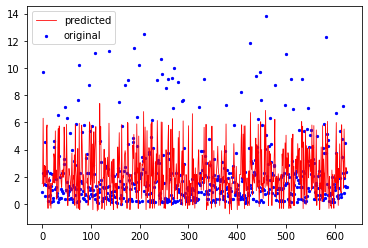

In [40]:
#Applying Linear Regression Model 
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)
# evaluate predictions
MAE_LR = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error Value is : %.3f' % MAE_LR)
#Calculating Mean Squared Error
MSE_LR = mean_squared_error(y_test, y_pred) # it can be raw_values
print('Mean squared Error Value is : %.3f' % MSE_LR)
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# Coefficients &variance

In [41]:
def Calc_Coef(model):
    print(model.coef_)
    

In [42]:
print('The Coefficients Lasso Model ')
Coef_LR= Calc_Coef(LinearRegressionModel)
print('The variance Lasso Model ')
statistics.variance(y_pred)


The Coefficients Lasso Model 
[ 0.53751077  1.51784412  3.41597941 -9.75747989 -2.12062064  7.22555514
  7.65207446 -0.0456478  -0.65588465]
The variance Lasso Model 


3.218337921832185

In [43]:
# save the model to disk
filename = 'Model/LR_model.sav'
pickle.dump(LinearRegressionModel, open(filename, 'wb'))


# Lasso  Apply

Mean Absolute Error Value is : 1.515
Mean Squared Error Value is  : 4.444


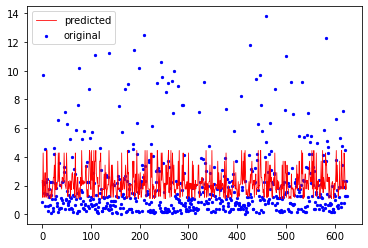

In [44]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train , y_train)
y_pred=lasso.predict(X_test)
#Calculating Mean Absolute Error
MAE_Lasso = mean_absolute_error(y_test, y_pred) # it can be raw_values
print('Mean Absolute Error Value is : %.3f' %  MAE_Lasso)
#Calculating Mean Squared Error
MSE_Lasso = mean_squared_error(y_test, y_pred) # it can be raw_values
print('Mean Squared Error Value is  : %.3f' %  MSE_Lasso)
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# Coefficients &variance

In [45]:
print('The Coefficients Lasso Model ')
Calc_Coef(lasso)
print('The variance Lasso Model ')
statistics.variance(y_pred)

The Coefficients Lasso Model 
[-0.         -0.55067695 -0.         -2.89927961 -0.          1.95734369
  0.          0.          0.        ]
The variance Lasso Model 


0.8366489197849668

In [46]:
# save the model to disk
filename = 'Model/Lasso_model.sav'
pickle.dump(lasso, open(filename, 'wb'))

# Ridge model Apply

Mean Absolute Error Value is : 1.220
Mean Squared Error Value is  : 3.111


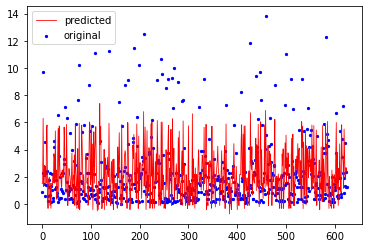

In [47]:
Ridge = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
Ridge.fit(X_train,y_train)
y_pred=Ridge.predict(X_test)
MAE_Ridge = mean_absolute_error(y_test, y_pred) # it can be raw_values
print('Mean Absolute Error Value is : %.3f' %  MAE_Ridge)
#Calculating Mean Squared Error
MSE_Ridge = mean_squared_error(y_test, y_pred) # it can be raw_values
print('Mean Squared Error Value is  : %.3f' %  MSE_Ridge)
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


# Coefficients &variance

In [48]:
print('The Coefficients Lasso Model ')
Calc_Coef(Ridge)
print('The variance Lasso Model ')
statistics.variance(y_pred)

The Coefficients Lasso Model 
[ 0.53756911  1.51136372  3.40890263 -9.74805931 -2.11597865  7.21727271
  7.64591663 -0.04464815 -0.6549247 ]
The variance Lasso Model 


3.214948765621271

In [49]:
# save the model to disk
filename = 'Model/Ridge_model.sav'
pickle.dump(Ridge, open(filename, 'wb'))

# SVR Model Apply

Mean Absolute Error Value is : 0.861
Mean Squared Error Value is  : 2.608


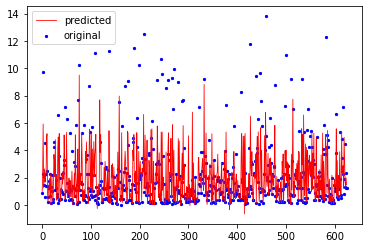

In [50]:
#Applying SVR Model 
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'poly') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)
y_pred = SVRModel.predict(X_test)

#Calculating Prediction

#Calculating Mean Absolute Error
MAE_SVR = mean_absolute_error(y_test, y_pred) # it can be raw_values
print('Mean Absolute Error Value is : %.3f' %  MAE_SVR)
#Calculating Mean Squared Error
MSE_SVR = mean_squared_error(y_test, y_pred) # it can be raw_values
print('Mean Squared Error Value is  : %.3f' %  MSE_SVR)
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()
# save the model to disk
filename = 'Model/SVR_model.sav'
pickle.dump(SVRModel, open(filename, 'wb'))

# Coefficients &variance

In [51]:
#print('The Coefficients Lasso Model ')
#Calc_Coef(SVRModel)
print('The variance Lasso Model ')
statistics.variance(y_pred)

The variance Lasso Model 


2.8286210998631187

# Voting Regressor¶ Ensemble Model


Mean Absolute Error Value is : 0.684
Mean Squared Error Value is  : 1.206


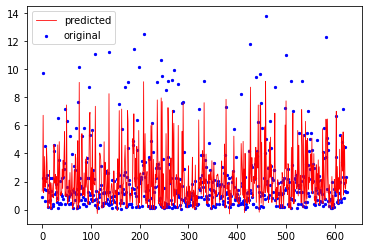

In [52]:
# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)
y_pred=ereg.predict(X_test)

#Calculating Mean Absolute Error
MAE_Vot = mean_absolute_error(y_test, y_pred) 
print('Mean Absolute Error Value is : %.3f' %  MAE_Vot)
#Calculating Mean Squared Error
MSE_Vot = mean_squared_error(y_test, y_pred)
print('Mean Squared Error Value is  : %.3f' %  MSE_Vot)
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()
# save the model to disk
filename = 'Model/Ensembel_model.sav'
pickle.dump(ereg, open(filename, 'wb'))

# Coefficients &variance

In [53]:
#print('The Coefficients Lasso Model ')
#Calc_Coef(ereg)
print('The variance Lasso Model ')
statistics.variance(y_pred)

The variance Lasso Model 


3.5659072896143065

# Apply ANN Model

C:\Users\Hussein Ashour\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Mean Absolute Error Value is : 0.743
Mean Squared Error Value is  : 1.570


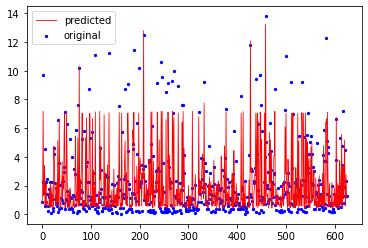

In [54]:
#Applying MLPRegressor Model 

MLPRegressorModel = MLPRegressor(activation='tanh', # can be also identity , logistic , relu
                                 solver='lbfgs',  # can be also sgd , adam
                                 learning_rate='constant', # can be also invscaling , adaptive
                                 early_stopping= False,
                                 alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPRegressorModel.fit(X_train, y_train)

#Calculating Prediction
y_pred = MLPRegressorModel.predict(X_test)
#Calculating Mean Absolute Error
MAE_ANN = mean_absolute_error(y_test, y_pred) # it can be raw_values
print('Mean Absolute Error Value is : %.3f' % MAE_ANN)
#Calculating Mean Squared Error
MSE_ANN = mean_squared_error(y_test, y_pred) # it can be raw_values
print('Mean Squared Error Value is  : %.3f' % MSE_ANN)
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()
# save the model to disk
filename = 'Model/MLPRegressorModel_model.sav'
pickle.dump(MLPRegressorModel, open(filename, 'wb'))

In [134]:
Weigths_MLP=MLPRegressorModel.coefs_
i=0
for Weigth in Weigths_MLP:
    i=i+1
    print("Layer" ,i)
    print("Neurons",len(Weigth))
    print("--------------------------")

    for w in Weigth:
        print(w.sum(axis=0))


Layer 1
Neurons 9
--------------------------
18.80300620525421
-5.91776963488992
-2.5614134530270247
20.804013148301497
0.2597597238895335
-8.17231282490543
-10.19599862627324
-0.6832342953781007
-0.4659436690819775
Layer 2
Neurons 100
--------------------------
2.1629248100056597
-0.0742829707394439
-1.831929526484265
0.3172470827309322
-0.8822662915070446
0.6413893329949573
-0.18693432306974914
0.5840816945877432
2.750688776651135
0.16974936741695512
-4.4257628629847945
-0.07476793617281557
-0.5255822048861111
-1.4444755045778752
-3.8869011992361946
-1.6861055111120011
-1.4521081695129325
-3.4204136732408585
-0.3922803776406429
-3.771286504218067
-1.3484379360579675
-3.089323889177329
-0.37429195266900905
4.642747890299684
0.5978303284420863
3.5187821993015826
0.9266489710745347
-0.7769157420014106
-0.468999802662006
1.8531522552498252
0.3132714547926155
-2.869289769808889
-2.7300410611044374
3.3506569097503327
4.053826484692584
1.4632932910317553
1.1406399932600353
2.943836091539355

# Coefficients &variance

In [55]:
#print('The Coefficients Lasso Model ')
#Calc_Coef(MLPRegressorModel)
print('The variance Lasso Model ')
statistics.variance(y_pred)

The variance Lasso Model 


4.666858836764695

# DNN Model Apply

(1892, 9)
(1892, 9, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 8, 32)             96        
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 24,993
Trainable params: 24,993
Non-trainable params: 0
_________________________________________________________________
42/42 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 7.5529e-04
[0

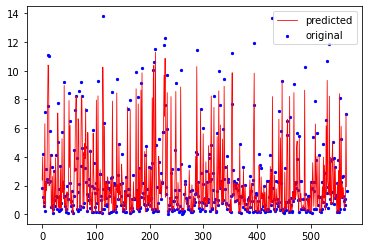

In [73]:
print(X.shape)
#convert dataframe to numpy array
X_New = X.to_numpy()
X_New= X_New.reshape(X_New.shape[0], X_New.shape[1], 1)
print(X_New.shape)
#Split Data into train and test set
xtrain, xtest, ytrain, ytest=train_test_split(X_New, y, test_size=0.3)

model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(X_New.shape[1],1)))
model.add(Flatten())

model.add(Dense(64, activation="relu"))

model.add(Dense(128, activation="relu"))

model.add(Dense(1))

model.compile(loss="mse", optimizer="adam", metrics = ['accuracy'])
model.summary()

model.fit(xtrain, ytrain, batch_size=10,epochs=200, verbose=0)
ypred = model.predict(xtest)

print(model.evaluate(xtrain, ytrain))
print("MSE: %.4f" % mean_squared_error(ytest, ypred))
MAE_DNN = mean_absolute_error(ytest, ypred) # it can be raw_values
print('Mean Absolute Error Value is : %.3f' % MAE_DNN)
#Calculating Mean Squared Error
MSE_DNN = mean_squared_error(ytest, ypred) # it can be raw_values
print('Mean Squared Error Value is  : %.3f' % MSE_DNN)
x_ax = range(len(ypred))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


In [57]:
# print out the weight coefficients of first layer
kernel_1, bias_1 = model.layers[0].get_weights()
print('kernel_1:')
print(kernel_1)
print('bias_1:')
print(bias_1)
print()
# print out the weight coefficients of second output layer
kernel_2, bias_2 = model.layers[2].get_weights()
print('kernel_2:')
print(kernel_2)
print('bias:_2')
print(bias_2)
print()
# print out the weight coefficients of third output layer
kernel_3, bias_3 = model.layers[3].get_weights()
print('kernel_3:')
print(kernel_3)
print('bias_3:')
print(bias_3)
print()



kernel_1:
[[[ 0.22538069 -0.16428623 -0.7425961  -1.248337    0.13470605
    0.37912512 -0.45764846 -0.2496384  -0.17590547 -0.05779332
    0.50526065  0.4073549   0.40108427 -0.33383948 -1.3852489
   -0.49887267  0.3659833   0.26996326 -0.00153015 -0.2968548
   -0.14172775  0.30503345 -0.23428358 -0.99460804  0.35909975
   -0.06706527  0.14315465 -0.02434245 -1.3900158  -0.03920132
   -0.2627854   0.22325492]]

 [[ 0.45128986  0.51266986  0.29483625  0.05707923  0.31987405
    0.35905847  0.3006608   0.18147612 -0.16558875 -0.12234457
   -0.36049834 -0.41145086  0.16317078  0.27963486 -0.01234721
    0.2588719   0.49766633  0.12202305 -0.07336004 -0.18944842
   -0.05737422  0.12822925  0.40382662  0.14139074 -0.30634502
   -0.99270767 -0.20640254 -0.23131245 -0.00611397 -0.14899476
   -0.14275348 -0.11740583]]]
bias_1:
[-0.19672005 -0.2295305   0.01624675  0.12292984 -0.09165195 -0.18990389
  0.01141125 -0.00042997  0.          0.         -0.16790879  0.02110403
 -0.1015286   0.008170

In [104]:
weights = model.get_weights() # returs a numpy list of weights7
weights

[array([[[-1.4913878e+00, -2.7083743e-01,  3.1921276e-01, -2.4325889e-01,
           5.6317419e-02,  1.6282128e-01,  1.2547994e-01, -1.3783310e-01,
           1.7232219e-02,  2.5257716e-01, -8.4853172e-04, -1.4299062e+00,
           1.7080128e-01,  9.9614911e-02, -9.4234419e-01, -2.8849185e-02,
           5.5134695e-02, -1.7104536e-02,  4.1209911e-03,  1.4571711e-01,
           3.2401800e-01, -1.3215828e-01,  4.8884630e-01,  2.6151937e-01,
           3.3165866e-01, -9.6725941e-02,  1.5442492e-01, -1.6105923e-01,
           1.6269867e-01,  1.6445352e-01, -1.4047766e-01,  2.7526712e-01]],
 
        [[ 4.1281420e-01, -2.9947913e-01,  3.5481054e-01, -4.7015756e-02,
          -8.2127392e-02, -3.2591891e-01,  3.6156964e-01, -4.3495357e-02,
          -9.5698513e-02,  9.2841029e-02, -2.2156093e-01,  8.1766590e-02,
          -2.3782377e-01, -3.7764933e-02,  5.7858932e-01, -2.5262642e-01,
          -4.2843962e-01, -4.1530997e-02, -1.2751022e-01,  3.3811137e-01,
           1.7068461e-01, -9.96831

In [114]:
i=0
for layer in model.layers:
    i=i+1
    print("weights layer ", i,"\n -------------------")   
    weights = layer.get_weights() # list of numpy arrays
    for w in weights:
        column_sums = w.sum(axis=0)
        print(column_sums)

weights layer  1 
 -------------------
[[-1.0785737  -0.57031655  0.6740233  -0.29027465 -0.02580997 -0.16309763
   0.48704958 -0.18132846 -0.0784663   0.34541818 -0.22240946 -1.3481396
  -0.06702249  0.06184998 -0.36375487 -0.2814756  -0.37330493 -0.05863553
  -0.12338923  0.48382849  0.4947026  -0.23184139  0.41899326  0.5990032
   0.4962501  -0.20453812  0.18572772 -0.1885474   0.12769043 -0.14489459
  -0.5543046   0.49030927]]
-0.8529235
weights layer  2 
 -------------------
weights layer  3 
 -------------------
[-3.4269068e+00 -1.1651600e+01 -4.5154352e+00 -3.1003551e+00
 -8.6445075e-01 -1.5340364e+00 -1.1288887e+01 -1.2875535e+01
 -8.1928205e+00 -6.6020288e+00 -2.0742510e+01 -5.1929398e+00
 -8.2810383e+00 -1.8407438e+01 -2.0221279e+00 -1.6069557e+01
 -5.5304718e+00 -7.9653225e+00 -8.9745522e+00 -3.1168602e+00
 -1.0595561e+01 -2.1914536e-02 -4.8249397e+00 -4.5693922e+00
 -3.7927306e+00 -3.3940103e+00 -5.1027184e+00 -4.2196989e+00
 -1.8358391e+01 -4.2640224e+00 -5.2514496e+00 -5.

In [102]:
i=0
for layer in model.layers:
    i=i+1
    print("weights layer ", i,"\n -------------------")
    
    weights = layer.get_weights() # list of numpy arrays
    for weight in weights:
        print("***********************")
        for w in weight:
            print("------------------------------")
            print(w)

weights layer  1 
 -------------------
***********************
------------------------------
[[-1.4913878e+00 -2.7083743e-01  3.1921276e-01 -2.4325889e-01
   5.6317419e-02  1.6282128e-01  1.2547994e-01 -1.3783310e-01
   1.7232219e-02  2.5257716e-01 -8.4853172e-04 -1.4299062e+00
   1.7080128e-01  9.9614911e-02 -9.4234419e-01 -2.8849185e-02
   5.5134695e-02 -1.7104536e-02  4.1209911e-03  1.4571711e-01
   3.2401800e-01 -1.3215828e-01  4.8884630e-01  2.6151937e-01
   3.3165866e-01 -9.6725941e-02  1.5442492e-01 -1.6105923e-01
   1.6269867e-01  1.6445352e-01 -1.4047766e-01  2.7526712e-01]]
------------------------------
[[ 0.4128142  -0.29947913  0.35481054 -0.04701576 -0.08212739 -0.3259189
   0.36156964 -0.04349536 -0.09569851  0.09284103 -0.22156093  0.08176659
  -0.23782377 -0.03776493  0.5785893  -0.25262642 -0.42843962 -0.041531
  -0.12751022  0.33811137  0.1706846  -0.09968311 -0.06985303  0.33748382
   0.16459142 -0.10781218  0.03130279 -0.02748817 -0.03500824 -0.3093481
  -0.413826

 -0.0767962  -0.03591701 -0.85141015  0.0135579 ]
------------------------------
[ 0.06589563 -0.03166045 -0.11589056 -0.0683048   0.02054894  0.13525093
  0.09316401  0.00303298  0.05663493  0.13279882 -0.06761497 -0.11665688
 -0.11228426 -0.05129611  0.03702185  0.06325133 -0.03174014  0.00724344
  0.05832659  0.07490396  0.07223938  0.06344     0.10088903 -0.046468
 -0.12749419 -0.046506    0.05415209 -0.01824748 -0.02604726  0.0540366
 -0.0697582  -0.01290172  0.02317861 -0.06728573  0.03792955  0.11205848
  0.00800729  0.0479545   0.06741491  0.12986076  0.00159326 -0.04986598
  0.01911843  0.10326293  0.12734103 -0.11727351  0.05530764  0.0126386
  0.05338648  0.08561903  0.10603136  0.09065574  0.13449258  0.04268956
  0.08194819  0.12591231  0.11558262  0.11615002 -0.11703502  0.10369927
 -0.09380698  0.10702516  0.00825928 -0.06337141]
------------------------------
[ 0.05969042  0.08720532  0.14055146 -0.02566792 -0.02988002 -0.07317741
  0.04360019 -0.19360186 -0.00123865 -0

  0.03128968 -0.08033172 -0.07427152  0.06260607]
------------------------------
[ 0.02186728  0.00327615 -0.04631588  0.04754109  0.07878136 -0.00464341
 -0.05621202 -0.23979312 -0.05468579 -0.18092519 -0.02770385 -0.03276633
 -0.1639516  -0.09459644 -0.04360098 -0.17583267  0.09504456 -0.17213549
 -0.14903788 -0.14353964 -0.07752341  0.00127609 -0.21682557  0.05253772
  0.075667    0.05934804  0.09442537 -0.13038482 -0.5031827  -0.12151719
 -0.1620217  -0.04730256 -0.08872971  0.06502583  0.2888145  -0.07392679
 -0.3673788  -0.1013713  -0.43134317 -0.09937043  0.18627572 -0.06315371
 -0.22231984 -0.0695328  -0.15451145 -0.13116665 -0.12998906 -0.07110426
 -0.1174477   0.15994582 -0.13556726 -0.20364018 -0.04338558 -0.21775158
 -0.19950709 -0.12049333 -0.18059258 -0.01956346 -0.08714791 -0.04313013
 -0.22234434 -0.12285418 -0.02829238 -0.24105005]
------------------------------
[ 0.0738084   0.06855735 -0.13605796 -0.08459572  0.10057602 -0.07195127
 -0.03780621 -0.15150174 -0.0345024

 -0.11937831  0.13462228 -0.0403113  -0.12599386]
------------------------------
[ 4.35644872e-02 -1.50686204e-01 -1.30123375e-02 -4.22971770e-02
  2.49109743e-03 -3.86552721e-01 -2.83051431e-01 -1.48017332e-01
 -3.32935452e-01 -6.07042909e-02 -9.26143453e-02 -8.73094127e-02
 -1.32354021e-01 -3.92743526e-03  3.68670723e-03 -2.75273055e-01
 -1.32533506e-01 -1.47728235e-01 -2.66992152e-01  1.01964131e-01
 -1.06987484e-01 -4.98845056e-02 -4.14620079e-02 -1.61739513e-01
  7.59543329e-02  1.14625759e-01 -8.38701501e-02 -5.37234247e-02
 -1.19073251e-02 -9.38425735e-02 -3.34468810e-03 -4.83541489e-02
 -1.34636298e-01  2.50736505e-01  3.52608293e-01 -9.44915488e-02
 -2.60425240e-01  8.14216584e-02 -1.70435265e-01  2.99080312e-02
  4.40005809e-01  5.41063258e-03 -1.24802522e-01 -1.27906337e-01
 -3.26052234e-02 -1.82616978e-03 -1.19289033e-01  1.64142728e-01
  1.04473112e-02 -1.52861970e-02  1.63838714e-02  4.38009165e-02
 -2.10557625e-01  2.89910361e-02 -4.54570875e-02  2.48144672e-04
 -1.69910

 -0.05496275 -0.11623385 -0.02988673  0.15206727]
------------------------------
[-0.47550747 -0.08163591  0.07178084  0.03617151 -0.14090946  0.11507481
  0.09159433 -0.09259593  0.01902069  0.05808972 -0.21853653  0.00723516
 -0.14956447 -0.15440986  0.04551832 -0.32881528  0.09123281  0.09949727
 -0.17794132  0.19064973 -0.28747666 -0.08958065 -0.02310602 -0.1398931
 -0.05631504  0.04691043  0.05368693 -0.15636386 -0.005268   -0.10822085
 -0.01930062 -0.11315247  0.08117978 -0.27128714 -0.12960286 -0.17105372
  0.17923392  0.07053422  0.14436314  0.09956236 -0.20870133 -0.09979125
 -0.10004747  0.11485768 -0.2911799  -0.26856506 -0.18089236  0.06906021
 -0.13314305 -0.60371786  0.04855414 -0.28359157  0.27904448  0.122576
 -0.12610321 -0.02279831  0.1387054  -0.08724307  0.02240936  0.12646593
 -0.01203319 -0.21122569  0.00553816  0.11344918]
------------------------------
[-0.08510287 -0.11471204  0.2784106  -0.03253266  0.01478843  0.39546922
  0.498785   -0.16735265  0.47813186  

------------------------------
[ 0.09611675  0.02719678 -0.02340466 -0.10253439  0.03704277 -0.04348536
  0.06473921  0.07012479  0.04908331  0.04248136 -0.02880608 -0.01519135
  0.13135496  0.03759776 -0.01309248 -0.10574435  0.09103279  0.05016309
  0.01654671 -0.09073757 -0.1153271  -0.05093141  0.08281484  0.12608838
  0.04852794  0.12191892 -0.08010234 -0.11842921  0.12729675  0.12154844
  0.02779876  0.05144106  0.09395598 -0.06202665  0.09349518 -0.05118997
 -0.06545662  0.10858452 -0.05818314  0.10326822  0.01220267 -0.07225784
  0.11710027  0.0970556   0.01790507 -0.10492329 -0.04150477 -0.09119357
 -0.07294639 -0.0283039  -0.0899987  -0.12928231 -0.0307565   0.11942303
 -0.01843321 -0.00224689 -0.07798758 -0.00265618 -0.00841893 -0.05108184
 -0.12035416 -0.02528701 -0.11885893  0.1063745 ]
------------------------------
[ 0.15620343  0.18231021 -0.09966159  0.02767559  0.25751564 -0.18429631
 -0.52551454  0.02271782 -0.3771428  -0.3245842  -0.12913503  0.0560941
  0.09207677 

[-0.09290943 -0.13943262 -0.16283675 -0.1349506  -0.13784592 -0.0204784
 -0.02841294  0.16205037  0.09427062 -0.14591026 -0.07349706  0.15730037
  0.127974    0.04364494  0.10822655 -0.17626116 -0.05641776  0.15047371
  0.11661676  0.02755412 -0.09956299  0.02952513  0.04073643 -0.1619559
  0.05366354 -0.09596614 -0.00263547 -0.09787265 -0.08441082 -0.03037112
  0.0074533  -0.06743572 -0.10476472 -0.07015293 -0.11549656 -0.10989036
 -0.1436475   0.00095534 -0.10707281 -0.16387953  0.04123221  0.01093432
  0.13492045  0.0756291   0.15179403  0.08132037  0.0033574  -0.16285475
  0.04498502 -0.06855843 -0.13082935 -0.09611565  0.13716446 -0.13370033
 -0.16276017 -0.08236325  0.14830813  0.10933855 -0.1311636  -0.07640436
 -0.170754   -0.05267399 -0.14384125 -0.11819654 -0.11098688  0.00683834
  0.14840458  0.06214482  0.16172731 -0.14040083 -0.06596979 -0.10893742
 -0.15381342 -0.16543382  0.10954379  0.123652   -0.04374445 -0.05020537
  0.14085552 -0.02488771  0.17043766 -0.02844211 -0.1

  6.23732984e-01  3.31701517e-01 -9.18443594e-03 -1.39025569e-01]
------------------------------
[ 0.3876647   0.20338368 -0.07164727 -0.08784731  0.27439925  0.3683217
 -0.07247167  0.3945306   0.388416   -0.34122592  0.18795587 -0.10006668
 -0.13966596  0.25047866 -0.37913677  0.23895301  0.09318004  0.28420404
  0.29722103  0.03941726 -0.5846349  -0.91076446 -0.15643772  0.04231378
  0.45799416  0.11187098  0.3312969   0.04447592  0.05851749  0.13410737
 -1.0714198  -0.05982722 -0.17757602  0.25954956  0.29942605  0.19817215
  0.01526883  0.3915776  -0.20683977  0.20861563  0.03078953  0.3610129
  0.15331133  0.5217673   0.12834004  0.2695523   0.08889944 -1.0103209
  0.05469813 -0.11253789  0.38644797 -0.42766365  0.00883841 -0.59676737
  0.17241016  0.25168857  0.04469172 -0.16621093  0.0743306  -0.12629619
  0.3425646  -0.15000631 -0.8636297   0.31599364 -0.27984583  0.24795565
  0.01832372 -0.01233679  0.28563392  0.20402884  0.08479056  0.16691719
 -0.18522668 -0.815052    0.08

-0.07911042
------------------------------
0.06602967
------------------------------
0.079121746
------------------------------
-0.037001614
------------------------------
0.1505294
------------------------------
0.005417068
------------------------------
-0.058670845
------------------------------
0.1357525
------------------------------
0.11976384
------------------------------
0.15526697
------------------------------
-0.14126085
------------------------------
-0.0706291
------------------------------
-0.16675863
------------------------------
0.021372642
------------------------------
0.12921801
------------------------------
-0.10376443
------------------------------
0.1326484
------------------------------
0.11730766
------------------------------
-0.082431965
------------------------------
-0.06213956
------------------------------
-0.07419442
------------------------------
0.06973018
------------------------------
0.1574882
------------------------------
0.0077903452
----------

for layer in model.layers:
    g=layer.get_config()
    h=layer.get_weights()
    print (g)
    print (h)

# Coefficients &variance

In [59]:
#print('The Coefficients Lasso Model ')
#Calc_Coef(model)
print('The variance Lasso Model ')
statistics.variance(y_pred)

The variance Lasso Model 


4.666858836764695

In [60]:
# Check OutPut
print(ypred[0:10])
print(ytest[0:10])

[[0.25186193]
 [4.2203817 ]
 [2.1771286 ]
 [3.0261402 ]
 [3.7400663 ]
 [5.399895  ]
 [1.1819764 ]
 [3.383406  ]
 [2.8764987 ]
 [1.5382391 ]]
452     0.473
1227    3.636
661     2.313
697     2.930
1667    3.388
745     1.530
1816    1.147
1711    3.040
1412    0.574
223     1.639
Name: Sett, dtype: float64


# Save Model

In [61]:
model.save('Model/DNN_Model.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Model/DNN_Model.model\assets


In [62]:
xtest[1]

array([[0.56365741],
       [0.43953488],
       [0.        ],
       [0.8640884 ],
       [0.        ],
       [1.        ],
       [0.26159999],
       [0.23222074],
       [0.25      ]])

In [63]:
new_model = tf.keras.models.load_model('Model/DNN_Model.model')

In [64]:
def prepare_data(data):
    scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
    train_df_Scal = scaler.fit_transform(data)
    X = pd.DataFrame(train_df_Scal)
    X_New = X.to_numpy()
    X_New= X_New.reshape(X_New.shape[0], X_New.shape[1], 1)
    return X_New

data1 = pd.DataFrame({
    'WC'  :[14.00    , 9.28    , 3.20  , 12.50   ],
    'DUW' :[17.80    , 16.09   , 13.50 , 16.98   ],
     'GC' :[55.00    , 15.40   , 0.00  , 35.57   ],
    'AF'  :[49.10    , 41.75   , 31.00 , 47.21   ],
    'C'   :[11.00    , 2.15    , 0.00  , 8.74    ],
    'LB'  :[6.40     , 4.20    , 1.00  , 5.82    ],
    'LKpa':[703.00   , 171.64  , 1.92  , 500.87  ],
    'TMin':[10949.60 , 2547.90 , 7.00  , 10855.52],
    'DB'  :[2.00     , 0.93    , 0.00  , 1.89    ]
    
})


data1=prepare_data(data1)

#print('after prepare\n ',data1,'\n----------')

my_prediction1 = new_model.predict(data1)
my_prediction0 = round(my_prediction1[3][0],3)

print(my_prediction1,my_prediction0 )


[[ 8.822287 ]
 [ 1.7979428]
 [-0.9728128]
 [ 4.8422537]] 4.842


new_model = tf.keras.models.load_model('DNN_Model.model')
ypredc=new_model.predict(xtest)

print(ytest[0:10])
print('================================')
print(ypred[0:10])
print('================================')
print(ypredc[0:10])


# Compare Between Models

In [65]:
models_Evaluate = pd.DataFrame({
    'Model': ['LR','Lasso','Ridge', 'SVR', 'Ensemble','ANN' ,'DNN' ],
     'MAE':[MAE_LR ,MAE_Lasso,MAE_Ridge, MAE_SVR,MAE_Vot , MAE_ANN,MAE_DNN],
     'MSE':[MSE_LR ,MSE_Lasso,MSE_Ridge ,MSE_SVR,MSE_Vot , MSE_ANN,MSE_DNN]})

models_Evaluate.sort_values(by='MAE', ascending=False)

,Model,MAE,MSE
1,Lasso,1.515231,4.443531
0,LR,1.220063,3.110878
2,Ridge,1.219889,3.110766
3,SVR,0.860903,2.608210
5,ANN,0.742686,1.569990
4,Ensemble,0.684343,1.205984
6,DNN,0.364547,0.563738


Text(0.5, 0, 'Algorithm')

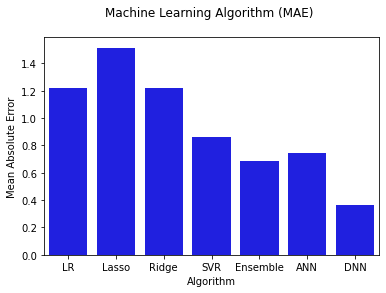

In [66]:
sns.barplot(x='Model', y = 'MAE', data = models_Evaluate, color = 'b')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm (MAE) \n')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Algorithm')

Text(0.5, 0, 'Algorithm')

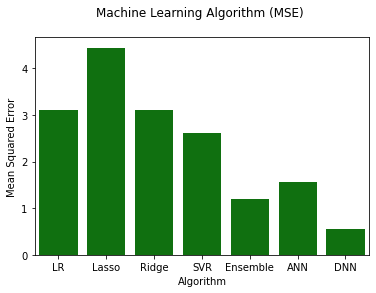

In [67]:
sns.barplot(x='Model', y = 'MSE', data = models_Evaluate, color = 'g')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm (MSE) \n')
plt.ylabel('Mean Squared Error')
plt.xlabel('Algorithm')